## 誤差の可視化
### 基本的なエラーバー

In [1]:
# 必要なパッケージのインポートとjupyter notebookの設定
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<Container object of 3 artists>

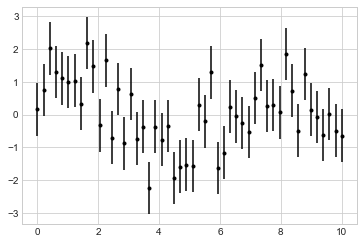

In [9]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

<Container object of 3 artists>

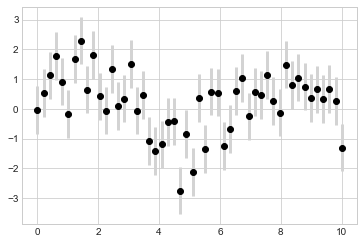

In [4]:
# エラーバーのオプション
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
                        ecolor='lightgray', elinewidth=3, capsize=0)

### 連続誤差
plt.plotやplt.fill_betweenなどの組み合わせで、エラーバーを連続した数量で表す。<br>
以下では例として、ガウス過程回帰の誤差を可視化する

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [26]:
# モデルを定義し、データを作成する
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8, 10,12])
ydata = model(xdata)

In [27]:
# ガウス過程回帰による当てはめを行う
gp = GaussianProcessRegressor()
#gp = GaussianProcessRegressor(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
 #                                   random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [28]:
xfit = np.linspace(0, 15, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * std

(0, 15)

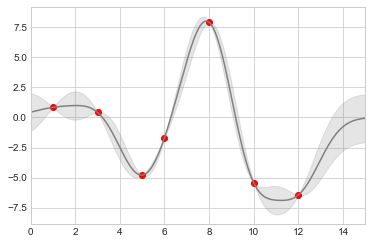

In [29]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)
plt.xlim(0, 15)